In [2]:
# 데이터 불러오기
import pandas as pd
# 상위 폴더로 나가서 data 폴더 접근
df = pd.read_csv('../data/전처리된_데이터.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/전처리된_데이터.csv'

In [3]:
# 모델링 및 파이프라인 
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 예시: 로지스틱 회귀 파이프라인
pipeline_lr = ImbPipeline([
    ('smote', SMOTE(random_state=42)),  # 불균형 처리
    ('model', LogisticRegression())     # 모델
])

In [ ]:
#학습 및 성능 비교 코드 작성 예정

In [4]:
#최종 모델 저장 
import joblib
import os

# 폴더가 없으면 만드는 안전장치
os.makedirs('../models/ML', exist_ok=True)

# 모델 저장
joblib.dump(best_model, '../models/ML/final_ml_model.pkl')

NameError: name 'best_model' is not defined

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. 데이터 불러오기
file_path = "../data/processed/Customer_Churn_Dataset_0_impute_label.csv"
df = pd.read_csv(file_path)

# 2. 불필요한 컬럼 제거 (인덱스 컬럼 등)
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# 3. 문제지(X)와 정답지(y) 나누기
target = 'Churn'  # 타겟 컬럼명 확인 필수
X = df.drop(columns=[target])
y = df[target]

# 4. 데이터 분할 (Train: 75%, Test: 25%)
# stratify=y 옵션은 이탈 고객의 비율을 유지하며 나누기 위해 필수입니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=0
)

# 잘 나뉘었는지 크기 확인
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X_train: (5282, 21)
X_test: (1761, 21)


In [18]:
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
tree = DecisionTreeClassifier(max_depth=5,class_weight='balanced')

# 학습
tree.fit(X_train, y_train)

# 추론
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
print("DecsionTree 정밀도(Precision) - 1기준")
print(f"Trainset : {precision_score(y_train, pred_train_tree)}, Testset: {precision_score(y_test, pred_test_tree)}")


DecsionTree 정밀도(Precision) - 1기준
Trainset : 0.6049149338374291, Testset: 0.5767634854771784


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

print("---------------train set Classification Report---------------")
print(classification_report(y_train, pred_train_tree))

---------------train set Classification Report---------------
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      3880
           1       0.60      0.91      0.73      1402

    accuracy                           0.82      5282
   macro avg       0.78      0.85      0.80      5282
weighted avg       0.87      0.82      0.83      5282



In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

print("---------------test set Classification Report---------------")
print(classification_report(y_test, pred_test_tree))

---------------test set Classification Report---------------
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      1294
           1       0.58      0.89      0.70       467

    accuracy                           0.80      1761
   macro avg       0.76      0.83      0.77      1761
weighted avg       0.85      0.80      0.81      1761



In [22]:
tree.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.48704567e-01, 5.85558354e-17, 0.00000000e+00, 4.77834859e-02,
       5.62522342e-02, 3.74164605e-03, 1.40434692e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.15582902e-01, 0.00000000e+00,
       0.00000000e+00, 3.21290331e-02, 6.87560575e-03, 0.00000000e+00,
       2.74887057e-01])

In [23]:
fi = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)
fi

Contract            4.155829e-01
numTechTickets      2.748871e-01
tenure              1.487046e-01
OnlineSecurity      5.625223e-02
InternetService     4.778349e-02
MonthlyCharges      3.212903e-02
DeviceProtection    1.404347e-02
TotalCharges        6.875606e-03
OnlineBackup        3.741646e-03
PhoneService        5.855584e-17
Partner             0.000000e+00
SeniorCitizen       0.000000e+00
gender              0.000000e+00
Dependents          0.000000e+00
StreamingTV         0.000000e+00
MultipleLines       0.000000e+00
TechSupport         0.000000e+00
PaymentMethod       0.000000e+00
PaperlessBilling    0.000000e+00
StreamingMovies     0.000000e+00
numAdminTickets     0.000000e+00
dtype: float64

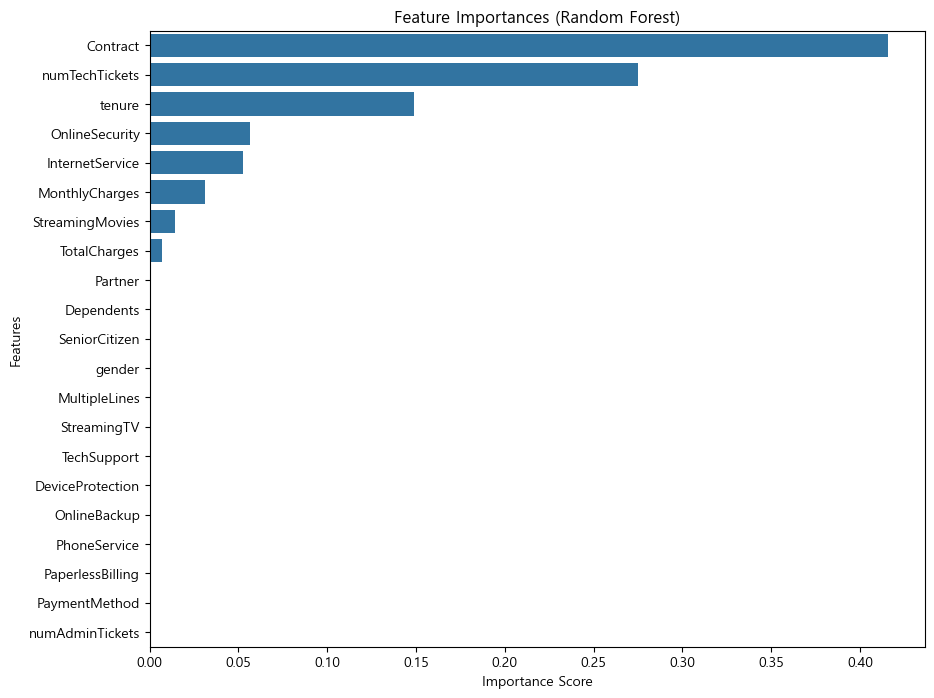

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 중요도와 변수명을 묶어서 데이터프레임 만들기
# (rf_model 대신 사용하신 모델 변수명을 넣으세요. 예: rf, tree 등)
importances = tree.feature_importances_
feature_names = X_train.columns

# 보기 좋게 정렬하기 위해 Series로 변환
ft_series = pd.Series(importances, index=feature_names)
ft_series = ft_series.sort_values(ascending=False)  # 내림차순 정렬

# 2. 시각화 그리기
plt.figure(figsize=(10, 8))  # 그림 사이즈 조절 (가로, 세로)
plt.title("Feature Importances (Random Forest)")

# seaborn을 이용해 가로 막대 그래프 그리기
sns.barplot(x=ft_series, y=ft_series.index)

# 라벨 달기
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## 랜덤 포레스트


In [31]:
###### RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# 모델 생성
rfc = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0)

# 학습
rfc.fit(X_train, y_train)

## 추론
pred_train_rfc = rfc.predict(X_train)
pred_test_rfc =  rfc.predict(X_test)

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Confusion Matrix
cm_train_rfc = confusion_matrix(y_train, pred_train_rfc)
cm_train_rfc

array([[3640,  240],
       [ 473,  929]])

c:\Users\Playdata\Desktop\SKN21_2TEAM\SKN21-2nd-4Team\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\Desktop\SKN21_2TEAM\SKN21-2nd-4Team\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\Desktop\SKN21_2TEAM\SKN21-2nd-4Team\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Playdata\Desktop\SKN21_2TEAM\SKN21-2nd-4Team\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


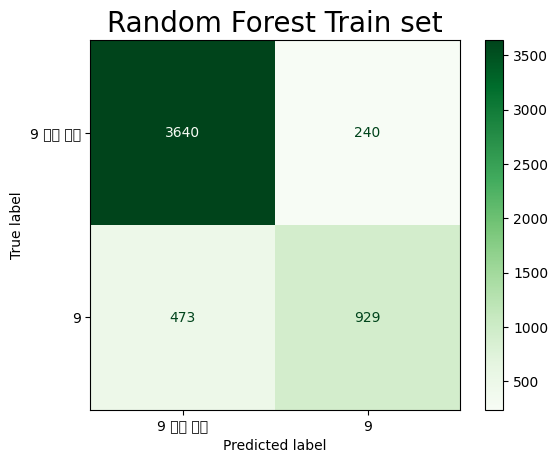

In [34]:
## Confusion Matrix Display
# 시각화 - matplotlib 를 이용해 plotting
### Trainset Confusion Matrix만 시각화.
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm_display2 = ConfusionMatrixDisplay(cm_train_rfc, display_labels=["9 이외 숫자", "9"])
cm_display2.plot(cmap="Greens")

plt.title("Random Forest Train set", fontsize=20)
plt.show()